In [1]:
import numpy as np
import pandas as pd

In [2]:
auto_price = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Automobile_price_data__Raw_.csv', sep = ',')
display(auto_price)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
auto_price.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
# Replace '?' by np.nan
auto_price.replace('?', np.nan, inplace = True)

In [5]:
auto_price.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
auto_price.select_dtypes(include = ['int64'])

,symboling,curb-weight,engine-size,city-mpg,highway-mpg
0,3,2548,130,21,27
1,3,2548,130,21,27
2,1,2823,152,19,26
3,2,2337,109,24,30
4,2,2824,136,18,22
...,...,...,...,...,...
200,-1,2952,141,23,28
201,-1,3049,141,19,25
202,-1,3012,173,18,23
203,-1,3217,145,26,27


In [7]:
# convert object columns to numerical columns
cols = ['bore','stroke','horsepower','peak-rpm','price']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric)

In [8]:
auto_price.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Central Tendencies

In [9]:
auto_price['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [10]:
auto_price['body-style'].mode()

0    sedan
dtype: object

In [11]:
# Median Value
auto_price['price'].median()

10295.0

In [12]:
# Mean Value
auto_price['price'].mean()

13207.129353233831

### Handling Missing Values

In [13]:
auto_price['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [14]:
# Typecast column from object data types to float
auto_price['normalized-losses'] = auto_price['normalized-losses'].astype('float64')

In [15]:
auto_price['normalized-losses'].replace(np.nan, auto_price['normalized-losses'].mean(), inplace = True)

In [16]:
auto_price.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [17]:
auto_price.dropna(inplace = True)

In [18]:
auto_price.shape

(193, 26)

### Basic Imputation Techniques
* imputation by using statistics of each column with missing values
* imputation with constant vlue

In [19]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Diabetes_Preprocessing.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [20]:
diabetes.shape

(768, 9)

In [21]:
diabetes.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

In [22]:
diabetes['Insulin'].replace(np.nan, diabetes['Insulin'].mean(), inplace = True)

In [23]:
diabetes.isnull().sum().sort_values(ascending = False)

SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Insulin                       0
Pregnancies                   0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
# strategy = 'mean', 'median', 'most_frequent'
impute = SimpleImputer(strategy='median')
# fit = train, transform = apply transformation
data_array = impute.fit_transform(diabetes)

In [25]:
diabetes_df = pd.DataFrame(data_array, columns = diabetes.columns)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.659898,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.0,105.659898,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.0,105.659898,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.0,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,11.0,76.0,48.0,18.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,7.0,27.0,105.659898,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.000000,26.2,0.245,3.0,0.0
766,1.0,126.0,6.0,27.0,105.659898,3.1,0.349,47.0,1.0


In [26]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

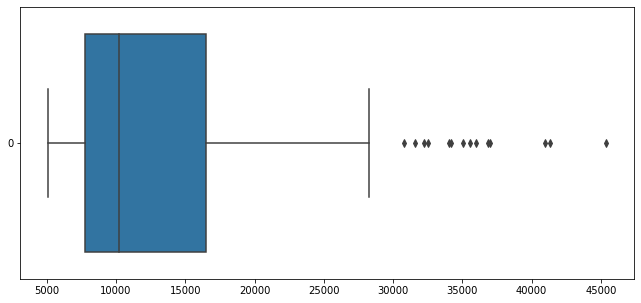

In [29]:
# figsize = (width,height)
plt.figure(figsize = (11,5))
# orient = orientation of plot h = horizontal
sns.boxplot(data = auto_price['price'], orient = 'h')

In [30]:
def find_outliers(df, cols):
    q1 = df[cols].quantile(.25)
    q3 = df[cols].quantile(.75)
    iqr = q3 - q1
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    outliers_indices = df.index[(df[cols] < min_r) | (df[cols] > max_r)]
    return outliers_indices

In [31]:
find_outliers(auto_price, 'price')

Int64Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128], dtype='int64')

### Treating Outliers
* Remove/Trim the ouliers
* Trim the data (5% to 95%)
* Mean/median apply imputation

In [32]:
import numpy as np
from scipy import stats

In [33]:
auto_price_numeric = auto_price.select_dtypes(include = ['int64','float64'])

In [34]:
z = np.abs(stats.zscore(auto_price_numeric))

In [35]:
# z-score > +3 or z-score < -3
np.where((z > 3) | (z < -3))

(array([ 15,  17,  17,  28,  28,  43,  44,  45,  45,  64,  64,  64,  65,
         65,  81,  97, 102, 104, 122, 146, 147, 153, 154, 162, 170, 172,
        175, 178, 180, 191]),
 array([15, 13, 14, 13, 14,  7,  7,  7, 11,  2,  7, 15,  7, 15, 13,  1,  9,
         9,  9, 10, 10, 12, 12, 10, 10, 10, 10,  1, 10, 10]))

In [36]:
auto_price.groupby(['make'])

In [37]:
auto_price.groupby(['make']).first()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
audi,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
bmw,2,192.0,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0
chevrolet,2,121.0,gas,std,two,hatchback,fwd,front,88.4,141.1,...,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
dodge,1,118.0,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
honda,2,137.0,gas,std,two,hatchback,fwd,front,86.6,144.6,...,92,1bbl,2.91,3.41,9.60,58.0,4800.0,49,54,6479.0
isuzu,0,122.0,gas,std,four,sedan,rwd,front,94.3,170.7,...,111,2bbl,3.31,3.23,8.50,78.0,4800.0,24,29,6785.0
jaguar,0,145.0,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,4.17,8.10,176.0,4750.0,15,19,32250.0
mazda,1,104.0,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.00,68.0,5000.0,30,31,5195.0


In [38]:
auto_price.groupby(['make','body-style']).first()

symboling  normalized-losses fuel-type aspiration  \
make          body-style                                                       
alfa-romero   convertible          3              122.0       gas        std   
              hatchback            1              122.0       gas        std   
audi          sedan                2              164.0       gas        std   
              wagon                1              122.0       gas        std   
bmw           sedan                2              192.0       gas        std   
chevrolet     hatchback            2              121.0       gas        std   
              sedan                0               81.0       gas        std   
dodge         hatchback            1              118.0       gas        std   
              sedan                1              148.0       gas        std   
              wagon               -1              110.0       gas        std   
honda         hatchback            2              137.0       gas        std   
              sedan                0              110.0       gas        std   
              wagon                0               78.0       gas        std   
isuzu         hatchback            2              122.0       gas        std   
              sedan                0              122.0       gas        std   
jaguar        sedan                0              145.0       gas        std   
mazda         hatchback            1              104.0       gas        std   
              sedan                1              113.0       gas        std   
mercedes-benz convertible          3              142.0       gas        std   
              hardtop              0               93.0    diesel      turbo   
              sedan               -1               93.0    diesel      turbo   
              wagon               -1               93.0    diesel      turbo   
mercury       hatchback            1              122.0       gas      turbo   
mitsubishi    hatchback            2              161.0       gas        std   
              sedan                1              125.0       gas        std   
nissan        hardtop              2              168.0       gas        std   
              hatchback            1              128.0       gas        std   
              sedan                1              128.0       gas        std   
              wagon                1              103.0       gas        std   
peugot        sedan                0              161.0       gas        std   
              wagon                0              122.0       gas        std   
plymouth      hatchback            1              119.0       gas        std   
              sedan                1              154.0       gas        std   
              wagon               -1               74.0       gas        std   
porsche       convertible          3              122.0       gas        std   
              hardtop              3              122.0       gas        std   
              hatchback            3              186.0       gas        std   
saab          hatchback            3              150.0       gas        std   
              sedan                2              104.0       gas        std   
subaru        hatchback            2               83.0       gas        std   
              sedan                0              102.0       gas        std   
              wagon                0               89.0       gas        std   
toyota        convertible          2              134.0       gas        std   
              hardtop              2              134.0       gas        std   
              hatchback            1               87.0       gas        std   
              sedan                0               91.0       gas        std   
              wagon                0               77.0       gas        std   
volkswagen    convertible          3              122.0       gas        std   
              hatchback    